In [90]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '/home/xd/Projects/CMU/caffe/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
model_root = '/home/xd/Projects/CMU/fcn.berkeleyvision.org/'
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [68]:
caffe.set_mode_cpu()

model_def = model_root + 'voc-fcn8s/deploy.prototxt'
model_weights = model_root + 'voc-fcn8s/fcn8s-heavy-pascal.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [125]:
#im = Image.open('/home/xd/Projects/CMU/TrainVal/VOCdevkit/VOC2011/JPEGImages/2007_000129.jpg')
im = Image.open('../images/cat.png')
in_ = np.array(im, dtype=np.float32)
print in_.shape
in_ = in_[:,:,::-1]
print in_.shape
#in_ -= np.array((104.00698793,116.66876762,122.67891434))                          
in_ = in_.transpose((2,0,1))
print in_.shape

(536, 536, 3)
(536, 536, 3)
(3, 536, 536)


In [126]:
print in_.shape
input_data = net.blobs['data']

for i in range(4):
    print input_data.shape[i]

(3, 536, 536)
1
3
500
334


In [194]:
weights = net.params['conv1_1'][0]
#bias = net.params['conv1_1'][1]

In [195]:
print weights.shape[0], weights.num
print weights.shape[1], weights.channels
print weights.shape[2], weights.height
print weights.shape[3], weights.width
weights.data.shape

64 64
3 3
3 3
3 3


(64, 3, 3, 3)

In [168]:
# shape for input (data blob is N x C x H x W), set data                           
net.blobs['data'].reshape(1, *in_.shape)                                           
net.blobs['data'].data[...] = in_

print list(net._layer_names)
# just run till the conv1_1 layer, inclusive
net.forward(start='input', end='conv1_1')

['input', 'data_input_0_split', 'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1', 'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2', 'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3', 'relu3_3', 'pool3', 'pool3_pool3_0_split', 'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3', 'relu4_3', 'pool4', 'pool4_pool4_0_split', 'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3', 'relu5_3', 'pool5', 'fc6', 'relu6', 'fc7', 'relu7', 'score_fr', 'upscore2', 'upscore2_upscore2_0_split', 'score_pool4', 'score_pool4c', 'fuse_pool4', 'upscore_pool4', 'upscore_pool4_upscore_pool4_0_split', 'score_pool3', 'score_pool3c', 'fuse_pool3', 'upscore8', 'score']


{'conv1_1': array([[[[ 0.73654503,  0.73654503,  0.73654503, ...,  0.73654503,
            0.73654503,  0.73654503],
          [ 0.73654503,  0.73654503,  0.73654503, ...,  0.73654503,
            0.73654503,  0.73654503],
          [ 0.73654503,  0.73654503,  0.73654503, ...,  0.73654503,
            0.73654503,  0.73654503],
          ..., 
          [ 0.73654503,  0.73654503,  0.73654503, ...,  0.73654503,
            0.73654503,  0.73654503],
          [ 0.73654503,  0.73654503,  0.73654503, ...,  0.73654503,
            0.73654503,  0.73654503],
          [ 0.73654503,  0.73654503,  0.73654503, ...,  0.73654503,
            0.73654503,  0.73654503]],
 
         [[ 0.09364352,  0.09364352,  0.09364352, ...,  0.09364352,
            0.09364352,  0.09364352],
          [ 0.09364352,  0.09364352,  0.09364352, ...,  0.09364352,
            0.09364352,  0.09364352],
          [ 0.09364352,  0.09364352,  0.09364352, ...,  0.09364352,
            0.09364352,  0.09364352],
          ..., 


In [169]:
# result of the convolution, initialized to 0
conv1_1_result = net.blobs['conv1_1']
print conv1_1_result.data.shape

(1, 64, 734, 734)


In [229]:
type(conv1_1_result.data[0])

numpy.ndarray

In [231]:
# can save all layers here
np.savetxt("caffe.csv", conv1_1_result.data[0, 0], delimiter=",")

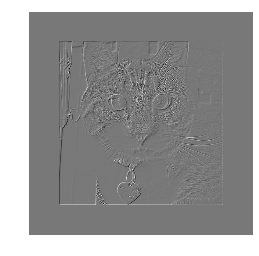

In [213]:
#filt_min, filt_max = conv1_1_result.data.min(), conv1_1_result.data.max()
plt.figure()
#plt.imshow(conv1_1_result.data[0, 0], cmap='gray', vmin=filt_min, vmax=filt_max)
plt.imshow(conv1_1_result.data[0, 0], cmap='gray')
plt.axis('off')
plt.savefig("test.png")

In [217]:
caffe_data = conv1_1_result.data[0, 0]

In [218]:
halide_data = np.genfromtxt("../test.csv", delimiter=",")

In [219]:
caffe_data.shape

(734, 734)

In [220]:
halide_data.shape

(734, 734)

In [223]:
for x in range(734):
    for y in range(734):
        caffe_val = caffe_data[x, y]
        halide_val = caffe_data[x, y]
        if caffe_val != halide_val:
            print x, y